# Prediction of the utilization using Neural Networks

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

import os
os.environ["KERAS_BACKEND"] = "torch"

import keras
from keras import Sequential
from keras.layers import Dense, Dropout

%matplotlib inline

### Cross validation and normalizing

We will perform the predictions for site 1 and site 2 separately, because they have different characteristics. 
The random state parameter means that the cross validation is reproducible and can be performed in the same way for the prediction using polynomial regression.

In [2]:
# read in the preprocessed data
Input_hourly = pd.read_csv('input_hourly.csv', parse_dates=['date'])

# split into input and output
X_site1 = Input_hourly.drop(["time_id", "date", "site1_utilization_percentage", "site2_utilization_percentage"], axis=1)
y_site1 = Input_hourly["site1_utilization_percentage"]

X_site2 = Input_hourly.drop(["time_id", "date", "site1_utilization_percentage", "site2_utilization_percentage"], axis=1)
y_site2 = Input_hourly["site2_utilization_percentage"]

# cross-validation
X_train_site1, X_test_site1, y_train_site1, y_test_site1 = train_test_split(X_site1, y_site1, test_size=0.3, random_state=42)

X_train_site2, X_test_site2, y_train_site2, y_test_site2 = train_test_split(X_site2, y_site2, test_size=0.3, random_state=42)

# normalize the data
scaler_site1 = StandardScaler()
scaler_site1.fit(X_train_site1)
X_train_site1 = scaler_site1.transform(X_train_site1)
X_test_site1 = scaler_site1.transform(X_test_site1)

scaler_site2 = StandardScaler()
scaler_site2.fit(X_train_site2)
X_train_site2 = scaler_site2.transform(X_train_site2)
X_test_site2 = scaler_site2.transform(X_test_site2)

## Utilization prediction of site 1

### Model definition (site 1)

In [3]:
model_site1 = Sequential(
    [Dense(36, activation="relu", input_shape=[X_train_site1.shape[1]]),
    Dense(36, activation="relu"),
     Dense(1)])
model_site1.compile(loss='mse',
             optimizer="adam",
             metrics=["mae", "mse"])
model_site1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 36)                1656      
                                                                 
 dense_1 (Dense)             (None, 36)                1332      
                                                                 
 dense_2 (Dense)             (None, 1)                 37        
                                                                 
Total params: 3,025
Trainable params: 3,025
Non-trainable params: 0
_________________________________________________________________


### Training the model (site 1)

Epoch 1/20
215/215 [==============================] - 2s 6ms/step - loss: 519.8807 - mae: 13.6444 - mse: 519.8807 - val_loss: 251.3384 - val_mae: 11.2461 - val_mse: 251.3384
Epoch 2/20
215/215 [==============================] - 1s 4ms/step - loss: 148.3217 - mae: 8.0284 - mse: 148.3217 - val_loss: 130.7649 - val_mae: 7.1238 - val_mse: 130.7649
Epoch 3/20
215/215 [==============================] - 1s 4ms/step - loss: 105.8409 - mae: 5.8928 - mse: 105.8409 - val_loss: 116.5357 - val_mae: 6.0272 - val_mse: 116.5357
Epoch 4/20
215/215 [==============================] - 1s 3ms/step - loss: 98.6037 - mae: 5.1937 - mse: 98.6037 - val_loss: 111.4088 - val_mae: 5.5284 - val_mse: 111.4088
Epoch 5/20
215/215 [==============================] - 1s 3ms/step - loss: 96.2118 - mae: 4.8677 - mse: 96.2118 - val_loss: 109.2542 - val_mae: 5.3271 - val_mse: 109.2542
Epoch 6/20
215/215 [==============================] - 1s 3ms/step - loss: 94.7929 - mae: 4.7538 - mse: 94.7929 - val_loss: 110.3145 - val_mae:

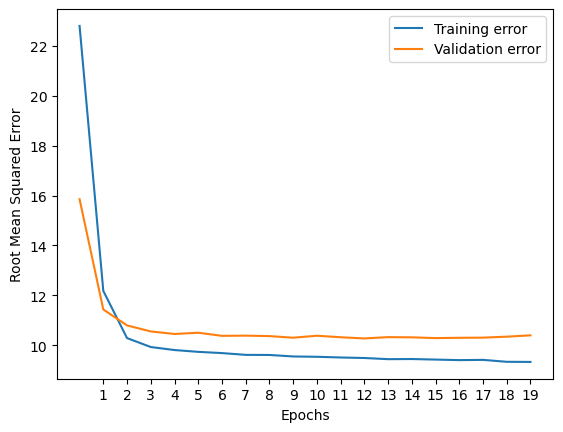

In [4]:
epochs_site1 = 20

# train the model
history_site1 = model_site1.fit(X_train_site1, y_train_site1.values,
                   epochs=epochs_site1, validation_split=0.2)
history_site1 = pd.DataFrame(history_site1.history)

# compute rmse
root_metrics_site1 = history_site1[["mse", "val_mse"]].apply(np.sqrt)
root_metrics_site1.rename({"mse":"rmse", "val_mse":"val_rmse"}, axis=1, inplace=True)

# plot rmse of the training and validation set per epoch
plt.Figure(figsize=(14,6), dpi=100)
plt.plot(root_metrics_site1["rmse"], label = 'Training error')
plt.plot(root_metrics_site1["val_rmse"], label = 'Validation error')

plt.xlabel("Epochs")
plt.ylabel("Root Mean Squared Error")

plt.xticks(range(1,20))
plt.legend()

plt.show()

### Prediction (site 1)

In [5]:
# prediction using the trained model
y_pred_site1 = model_site1.predict(X_test_site1)

115/115 [==============================] - 0s 2ms/step


### Evaluation (site 1)

In [6]:
print("RMSE: ", np.sqrt(mean_squared_error(y_test_site1, y_pred_site1)))
print("MAE: ", mean_absolute_error(y_test_site1, y_pred_site1))
print("MAPE: ", mean_absolute_percentage_error(y_test_site1, y_pred_site1))

RMSE:  9.969991686724043
MAE:  4.890667357056707
MAPE:  3204729705886587.5


## Utilization prediction of site 2

### Model definition (site 2)

In [7]:
model_site2 = Sequential(
    [Dense(36, activation="relu", input_shape=[X_train_site2.shape[1]]),
    Dense(36, activation="relu"),
     Dense(1)])
model_site2.compile(loss='mse',
             optimizer="adam",
             metrics=["mae", "mse"])
model_site2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 36)                1656      
                                                                 
 dense_4 (Dense)             (None, 36)                1332      
                                                                 
 dense_5 (Dense)             (None, 1)                 37        
                                                                 
Total params: 3,025
Trainable params: 3,025
Non-trainable params: 0
_________________________________________________________________


### Training the model (site 2)

Epoch 1/20
215/215 [==============================] - 2s 5ms/step - loss: 82.0813 - mae: 5.6369 - mse: 82.0813 - val_loss: 40.7425 - val_mae: 4.2595 - val_mse: 40.7425
Epoch 2/20
215/215 [==============================] - 1s 3ms/step - loss: 38.9708 - mae: 4.0477 - mse: 38.9708 - val_loss: 32.5347 - val_mae: 3.7704 - val_mse: 32.5347
Epoch 3/20
215/215 [==============================] - 1s 3ms/step - loss: 34.9577 - mae: 3.7160 - mse: 34.9577 - val_loss: 30.4115 - val_mae: 3.5161 - val_mse: 30.4115
Epoch 4/20
215/215 [==============================] - 1s 4ms/step - loss: 33.4281 - mae: 3.5553 - mse: 33.4281 - val_loss: 29.4752 - val_mae: 3.4033 - val_mse: 29.4752
Epoch 5/20
215/215 [==============================] - 1s 4ms/step - loss: 32.4525 - mae: 3.4915 - mse: 32.4525 - val_loss: 29.1980 - val_mae: 3.3809 - val_mse: 29.1980
Epoch 6/20
215/215 [==============================] - 1s 3ms/step - loss: 31.9275 - mae: 3.4371 - mse: 31.9275 - val_loss: 29.3352 - val_mae: 3.4053 - val_mse: 

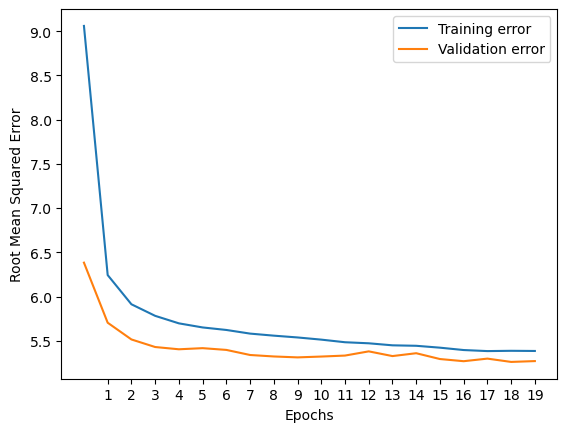

In [8]:
epochs_site2 = 20

# train the model
history_site2 = model_site2.fit(X_train_site2, y_train_site2.values,
                   epochs=epochs_site2, validation_split=0.2)
history_site2 = pd.DataFrame(history_site2.history)

# compute rmse
root_metrics_site2 = history_site2[["mse", "val_mse"]].apply(np.sqrt)
root_metrics_site2.rename({"mse":"rmse", "val_mse":"val_rmse"}, axis=1, inplace=True)

# plot rmse of the training and validation set per epoch
plt.Figure(figsize=(14,6), dpi=100)
plt.plot(root_metrics_site2["rmse"], label = 'Training error')
plt.plot(root_metrics_site2["val_rmse"], label = 'Validation error')

plt.xlabel("Epochs")
plt.ylabel("Root Mean Squared Error")

plt.xticks(range(1,20))
plt.legend()

plt.show()

### Prediction (site 2)

In [9]:
# prediction using the trained model
y_pred_site2 = model_site2.predict(X_test_site2)

115/115 [==============================] - 0s 2ms/step


### Evaluation (site 2)

In [10]:
print("RMSE: ", np.sqrt(mean_squared_error(y_test_site2, y_pred_site2)))
print("MAE: ", mean_absolute_error(y_test_site2, y_pred_site2))
print("MAPE: ", mean_absolute_percentage_error(y_test_site2, y_pred_site2))

RMSE:  5.495303571800236
MAE:  3.3755191204934962
MAPE:  3043288419094096.0
